# Graph Lab

## Header information:

  - Author #1: Adam Podolak (podola2@mcmaster.ca)
  - Author #2: Justin Ho (hoj66@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/podola2/l1-graph-lab
  - Avenue to Learn group name: Group 58

In [1]:
#Loading the graph from the CSV files
from GraphFactory import *
from graph import *

def import_graph():
    return BuildEdgeGraph.build()
    

In [2]:
#Computing the Metrics
from MetricsExtractor import *
from graph import *

graph = import_graph()

selector = Selector()

def get_num_nodes(graph):
    selector.set_metrics_extractor(GetNumberOfNodes())
    num_nodes = selector.execute(graph)
    return num_nodes


def get_num_edges(graph):
    selector.set_metrics_extractor(GetNumberOfEdges())
    num_edges = selector.execute(graph)
    return num_edges

def get_average_degree(graph):
    selector.set_metrics_extractor(GetAverageDegreeNodes())
    avg_dg_nodes = selector.execute(graph)
    return avg_dg_nodes


def get_degree_distribution(graph):
    selector.set_metrics_extractor(GetDegreeDistribution())
    node_degree_distribution = selector.execute(graph)
    return node_degree_distribution

def get_degree_node(graph, stationNumber):
    dg_dist = get_degree_distribution(graph)
    node_dg = dg_dist[stationNumber - 1]
    return node_dg

def main():
    print("Number of nodes in graph: " + str(get_num_nodes(graph)))
    print("Number of edges in graph: " + str(get_num_edges(graph)))
    print("Average degree of the nodes: " + str(get_average_degree(graph)))
    print("Degree distribution (modelled as an array \nwhere the stations are represented by the indices and the value at a specific index is the degree of the station/node): \n" + str(get_degree_distribution(graph)))
    print("\nRetrieving different node degrees: \nDegree of station 11: " + str(get_degree_node(graph, 11)))
    print("Degree of station 21: " + str(get_degree_node(graph, 21)))
    print("Degree of station 14: " + str(get_degree_node(graph, 14)))
    print("Degree of station 247: " + str(get_degree_node(graph, 247)))

main()

Number of nodes in graph: 303
Number of edges in graph: 406
Average degree of the nodes: 2
Degree distribution (modelled as an array 
where the stations are represented by the indices and the value at a specific index is the degree of the station/node): 
[5, 3, 4, 2, 2, 1, 2, 2, 2, 2, 10, 2, 6, 6, 3, 2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 1, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 4, 2, 2, 4, 2, 2, 1, 2, 5, 3, 2, 2, 8, 1, 6, 6, 2, 6, 3, 4, 4, 2, 2, 2, 6, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 5, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 12, 2, 2, 2, 2, 2, 4, 1, 2, 3, 2, 8, 4, 2, 2, 2, 4, 2, 2, 6, 1, 4, 8, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 6, 2, 2, 2, 2, 6, 8, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 1, 4, 4, 2, 4, 4, 2

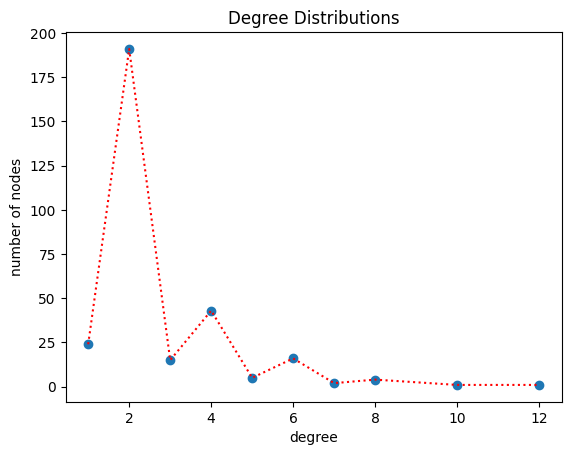

In [3]:
#Graphing the Degree Distributions 
import matplotlib.pyplot as plt

graph = import_graph()

def getX(graph): #x axis is the degrees
    deg_dist = get_degree_distribution(graph)
    deg_dist.sort()
    deg_dist = list(dict.fromkeys(deg_dist))
    return deg_dist

def getY(graph): #y axis is number of nodes with such degree
    deg_dist = get_degree_distribution(graph)
    degrees = getX(graph)
    
    num_nodes = []
    
    for d in degrees:
        num_nodes.append(0)
    
    
    for i in range(0, len(degrees)):
        count = 0
        for j in range(0, len(deg_dist)):
            if deg_dist[j] == degrees[i]:
                count += 1
                num_nodes[i] = count
        count = 0
    
    return num_nodes

plt.plot(getX(graph), getY(graph), 'o')
plt.plot(getX(graph), getY(graph), 'r:')
plt.title("Degree Distributions")
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

Week 1 Report
====================

### Work Distibution

Adam Podolak:
+ Modular Design (implementing design patterns and object oriented principles)
+ Implementation of Metrics Extractor
+ Importing the graph, computing the metrics, plotting degree distribution
+ Implementation of Benchmarks
+ Benchmark Analysis 
+ Design Justification
+ UML Diagram

Justin Ho
+ Implementation of graph builder methods and algoirthms
+ Implementation of Dijkstra's algorithm
+ Implementation of A* algorithm

UML Diagram
---------------------
insert uml here

Justification of Design Choices
---------------------

#### Graph Factory

Considering that the csv files for the graphs may change, the implementation of an object oriented graph library that encapsulated the creation of graphs and formatting of csv files was necessary. Our group decided to implement a Factory Pattern in order to encapsulate the creation of graphs.

Our Graph Factory consists of a GraphFactory class that allows us to build a concrete Graph, like a ConnectionsGraph (a graph consisting of all the connections), or a SationsGraph. In this scenario, Factory Pattern is beneficial because it encapsulates object instantiation and object creation. If the format of the csv file were to change, we can easily create a new Graph and implement a new implementation of format_csv_file that is modified to work with the new file format. The concrete Graphs return a list of connections, or a list of the stations. The EdgeGraph class then uses this to form an adjescency matrix which is the final representation of our graph. Tying it all together, the BuildEdgeGraph class acts as a runner class that allows us to instantiate graph factories, create the concrete graph builder/formatter(ConnectionsGraph or StationsGraph), format the csv files, and create the EdgeGraph, all in one class. 

In conclusion, a factory pattern implementation was chosen for the graph library because it allows us to encapsulate object instation and object creation. If the formats of the csv files were to change, the library adheres to open/closed principles, since we would be open to extend by creating new graph formatters, while closed for modification because we wouldn't be modifying existing source code. The factory pattern also adhers to dependency inversion principles which reduces coupling, makes the library more stable, and gives more flexibility at runtime. 

#### Metrics Extractor

For the Metrics Extractor, a strategy pattern was implemented to allow for the addition of more metrics extractors in the future, if new metrics were added and needed to be calculated.The strategy pattern allows us to alter the behaviour of our metrics extractor at runtime, being able to choose which metric we want to extract at any given time. We can simply use the selector class to set and execute metric extraction as we please. This allows for our code to be open for extension, where new metrics extractors can be easily added if new metrics are needed and allows for maximum flexibility at runtime.

#### Pathfinder Factory

For the pathfinding algorithms, a similar factory pattern was implemented to allow for the encapsulation of pathfinding algorithms. The design supports the inclusion of additional pathfinding algorithms in an open/closed way, while allowing for the encapsulation of object instantiation and creation. New pathfinding algorithms can be added at any time without modifying existing source code. The PathfinderFactory and PathfindingAlgorithm classes also support benchmarking with a PathfinderResult that allows us to measure the number of nodes visited, number of edges visited, and travel time for a given path and pathfinding algorithm. Once again, the factory pattern is beneficial in this case because it adheres to open/closed principles, dependency inversion, and allows for more stability and flexibility at runtime.

Benchmark Results
---------------------